# DESAFIO 2

# Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from particula import Particula
from funcoes import step, lista_inicial
plt.style.use('seaborn-bright')
import lmfit
from sklearn.linear_model import LinearRegression

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_15520\465682710.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


# Simulação:

In [2]:
# parâmetros sistema:
NUM_PARTICULAS= 180
TAMANHO_CAIXA = 370
MASSA = 0.5
RAIO = 1
REATIVIDADE = 1

# parâmetros simulação:
TFIM = 40
NUM_STEPS = 400
STEP = TFIM/NUM_STEPS

In [3]:
PARTICULAS = lista_inicial(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = REATIVIDADE)
print(len(PARTICULAS))
for i in range(NUM_STEPS):
    step(PARTICULAS, STEP, TAMANHO_CAIXA)

180


# Resultados:

### Animação das partículas:

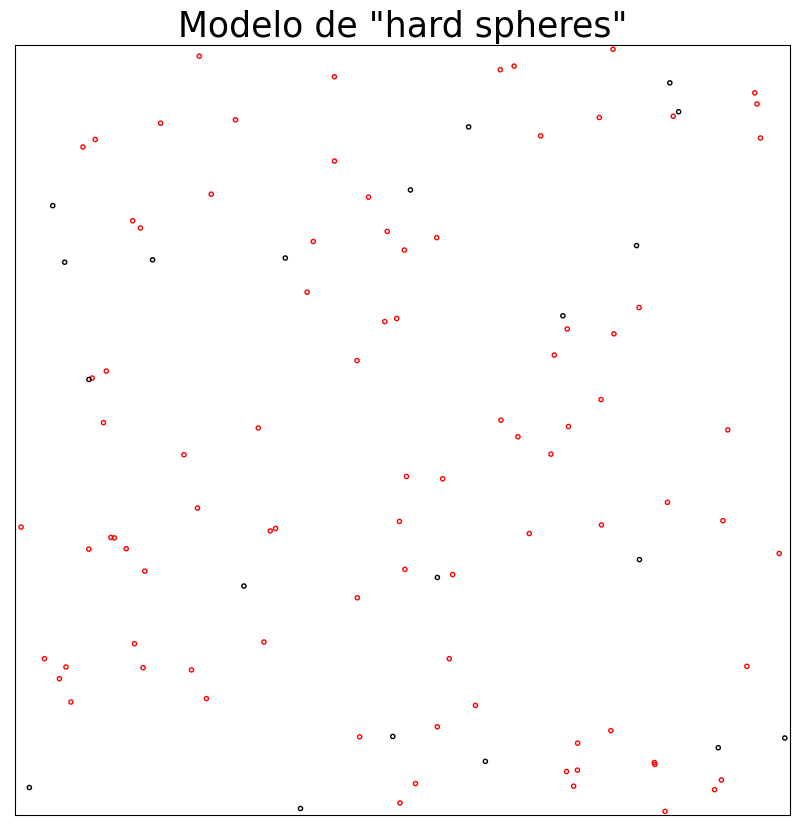

In [4]:
trajetorias = []
existencia = []
cores = []
for i in PARTICULAS:
    traj = list(i.trapos)
    exist = list(i.lista_existe)
    lista_cores = list(i.lista_tipo)
    trajetorias.append(traj)
    existencia.append(exist)
    cores.append(lista_cores)
fig, ax = plt.subplots(1, 1, figsize = (10,10))
ims = []

ax.set_xlim(0,TAMANHO_CAIXA)
ax.set_ylim(0,TAMANHO_CAIXA)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Modelo de "hard spheres"', fontsize = 25)

for k in range(NUM_STEPS):
    circles = []
    for h in range(len(trajetorias)):
        x = trajetorias[h][k][0]
        y = trajetorias[h][k][1]
        e = existencia[h][k]
        cor = cores[h][k]
        if e == 1:
            circle = plt.Circle((x, y), RAIO, fill=False, color = cor)
            ax.add_artist(circle)
            circles.append(circle)
    ims.append(circles)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=10, bitrate=4000)
ani.save(r"resultados/trajetorias_react.png", writer=writer, dpi=100)

In [5]:
A = []
B = []
for k in range(NUM_STEPS):
    a = 0
    b = 0
    
    for h in range(len(trajetorias)):
        cor = cores[h][k]
        e = existencia[h][k]
        if cor == '0' and e == 1:
            a = a+1
        if cor == 'r' and e == 1:
            b = b+1
    A.append(a)
    B.append(b)


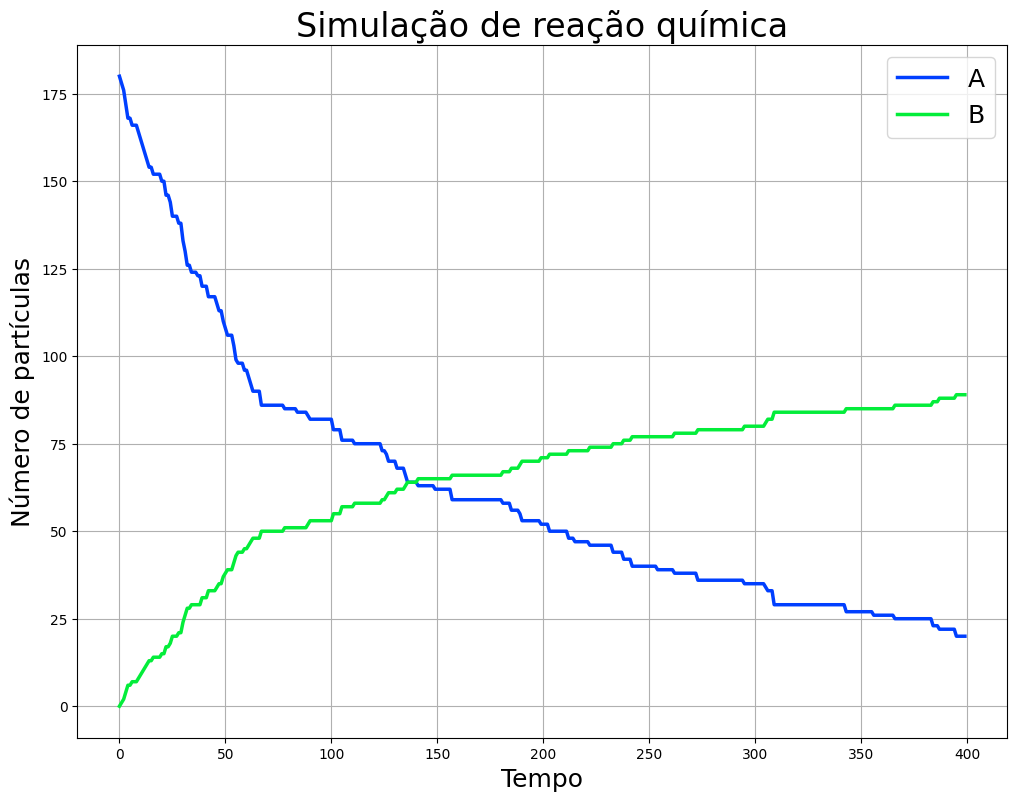

In [6]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação química', fontsize = 24)
ax.set_ylabel('Número de partículas', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')
ax.plot(range(NUM_STEPS), A, linewidth = 2.5, label = 'A')
ax.plot(range(NUM_STEPS), B, linewidth = 2.5, label = 'B')
ax.legend(fontsize=18)

#plt.savefig(r'resultados/react', dpi = 200)

In [7]:
print(A[-1])

20


### Lei de velocidade

In [8]:
tempo = list(range(NUM_STEPS))

In [9]:
def funcao_fit(x, k,C, D):
    return C*np.exp(-k*x) + D

funcao_fit_model=lmfit.Model(funcao_fit)
funcao_fit_model.set_param_hint('D',value=32, vary=True)#,min= -10,max=10,vary=True) 
funcao_fit_model.set_param_hint('C',value=150, vary=True)#,min= -10,max=10,vary=True) 
funcao_fit_model.set_param_hint('k',value=0.05, vary=True)#,min= -10,max=10,vary=True) 

param = funcao_fit_model.make_params()
results = funcao_fit_model.fit(A, x = tempo, params = param)
k = results.params['k'].value
D = results.params['D'].value
C = results.params['C'].value
x_fit = np.linspace(0, NUM_STEPS)
y_fit = funcao_fit(x_fit, k, C, D)
b_fit = (-np.array(y_fit) + A[0])/2

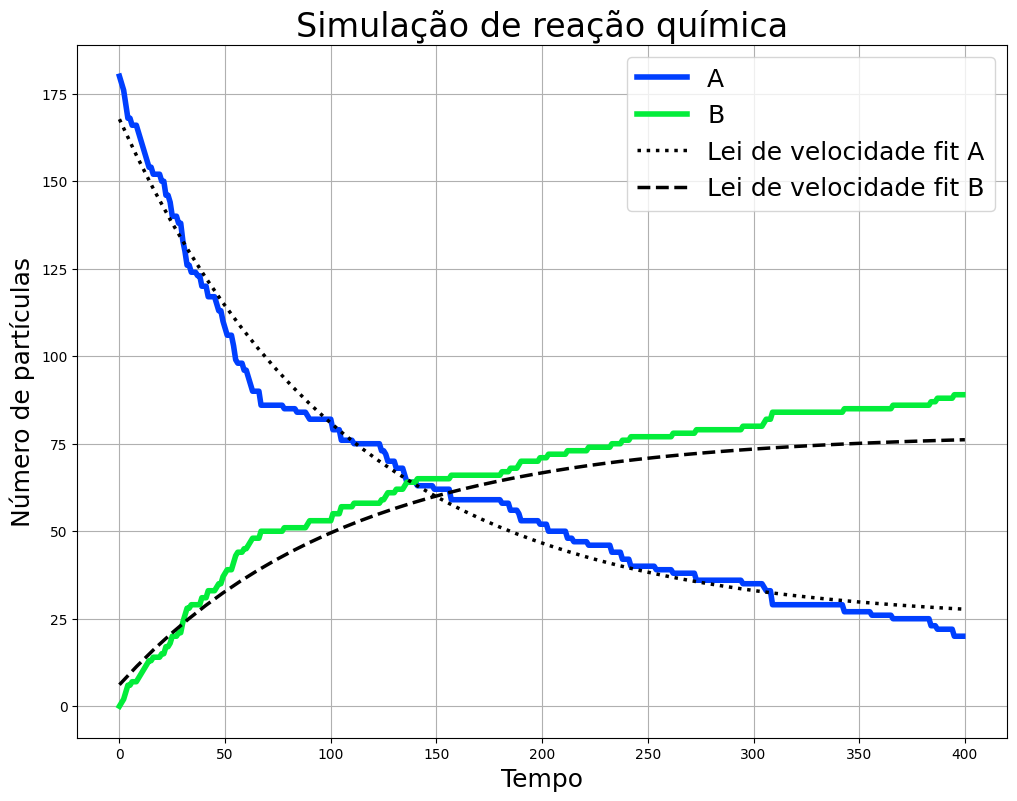

In [10]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Simulação de reação química', fontsize = 24)
ax.set_ylabel('Número de partículas', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 18)
ax.grid('- -')
ax.plot(range(NUM_STEPS), A, linewidth = 4, label = 'A')
ax.plot(range(NUM_STEPS), B, linewidth = 4, label = 'B')
ax.plot(x_fit, y_fit, linewidth = 2.5, linestyle = ':', c= '0', label = 'Lei de velocidade fit A')
ax.plot(x_fit, b_fit, linewidth = 2.5, linestyle = '--', c= '0', label = 'Lei de velocidade fit B')


ax.legend(fontsize=18)

plt.savefig(r'resultados/react', dpi = 200)

## Taxa em função da concentração

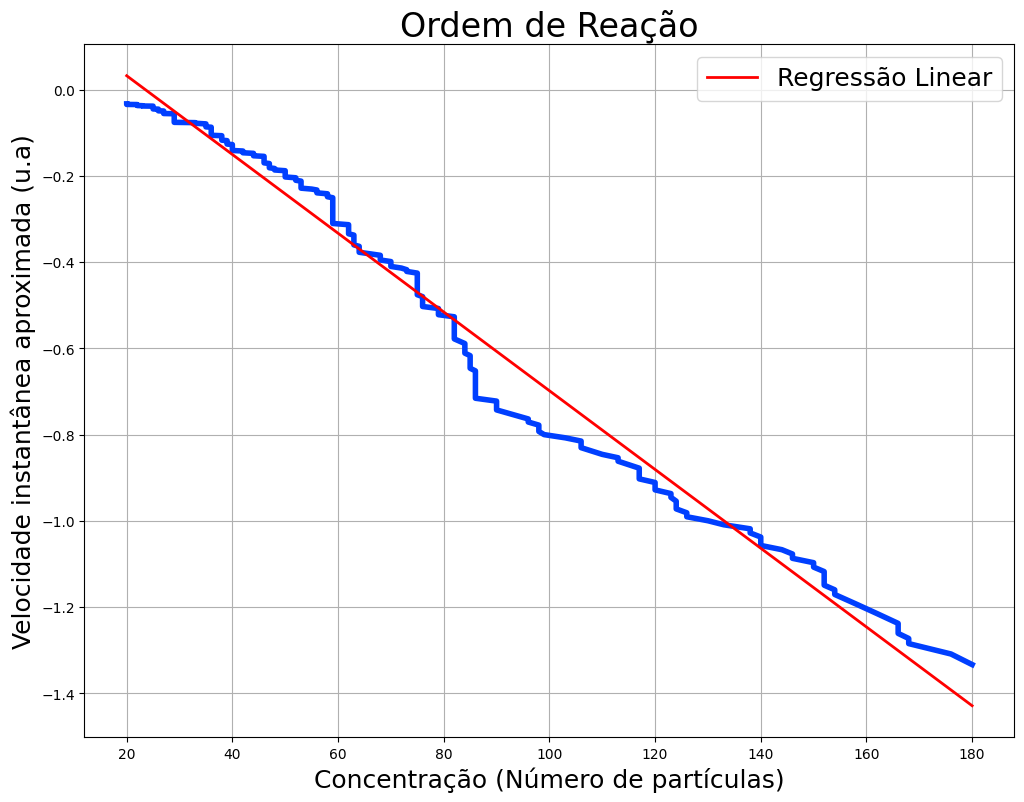

In [11]:
def derivada_do_fit(x, k,C, D):
    return -k*C*np.exp(-k*x)

V = derivada_do_fit(np.array(range(len(A))), k, C, D)
X = np.array(A).reshape(-1, 1)  
y = V

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

X = np.linspace(X[0],X[-1] )
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Ordem de Reação', fontsize = 24)
ax.set_ylabel('Velocidade instantânea aproximada (u.a)', fontsize = 18)
ax.set_xlabel('Concentração (Número de partículas)', fontsize = 18)
ax.grid('- -')
ax.plot(A, V, linewidth = 4)
ax.plot(X, model.predict(X), color='red', label='Regressão Linear',linewidth = 2)



ax.legend(fontsize=18)

plt.savefig(r'resultados/ordem', dpi = 200)

### Reatividade

In [12]:
# parâmetros sistema:
NUM_PARTICULAS= 180
TAMANHO_CAIXA = 300
MASSA = 0.5
RAIO = 1.2
REATIVIDADE = [0.1,0.2,0.3,0.4,0.5,0.6, 0.7,0.8,0.9,1.0]

# parâmetros simulação:
TFIM = 40
NUM_STEPS = 400
STEP = TFIM/NUM_STEPS

180
180
180
180
180
180
180
180
180
180


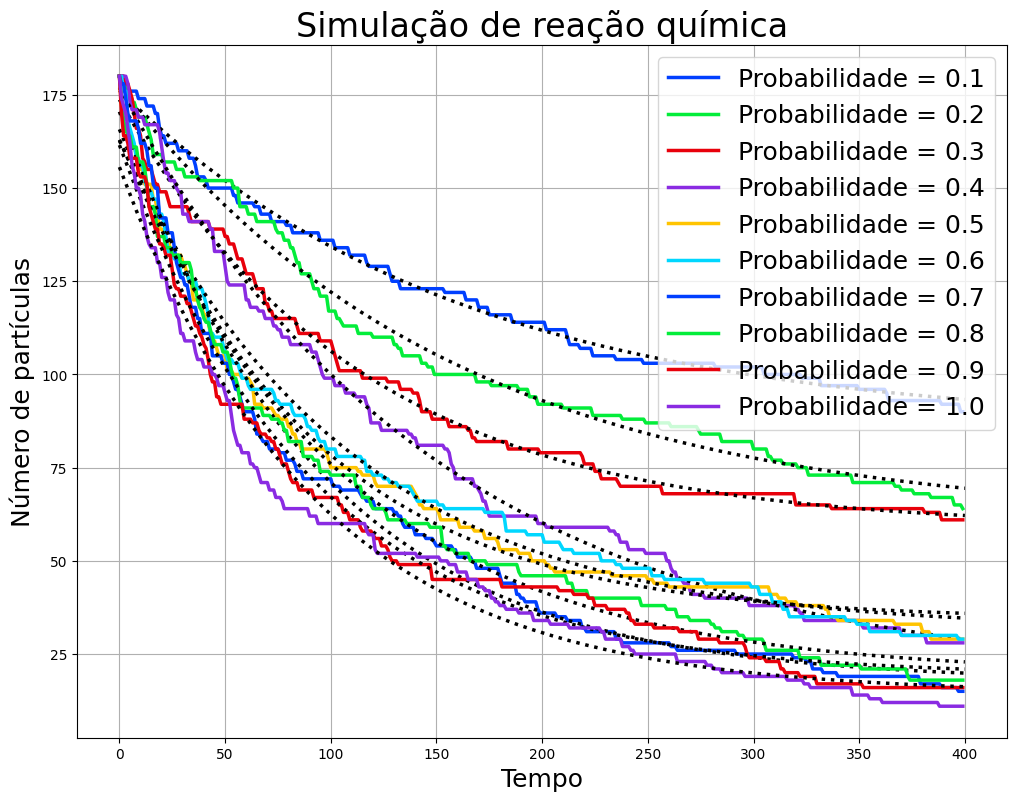

In [13]:
fig1, ax1 = plt.subplots(1,1, figsize = (12, 9))
ax1.set_title('Simulação de reação química', fontsize = 24)
ax1.set_ylabel('Número de partículas', fontsize = 18)
ax1.set_xlabel('Tempo', fontsize = 18)
ax1.grid('- -')

Ks = []

def funcao_fit(x, k,C, D):
    return C*np.exp(-k*x) + D
    
for reatividade in REATIVIDADE:
    
    PARTICULAS = lista_inicial(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = reatividade)
    print(len(PARTICULAS))
    for i in range(NUM_STEPS):
        step(PARTICULAS, STEP, TAMANHO_CAIXA)
    
    trajetorias = []
    existencia = []
    cores = []
    for i in PARTICULAS:
        traj = list(i.trapos)
        exist = list(i.lista_existe)
        lista_cores = list(i.lista_tipo)
        trajetorias.append(traj)
        existencia.append(exist)
        cores.append(lista_cores)
        
    A = []
    B = []
    for k in range(NUM_STEPS):
        a = 0
        b = 0

        for h in range(len(trajetorias)):
            cor = cores[h][k]
            e = existencia[h][k]
            if cor == '0' and e == 1:
                a = a+1
            if cor == 'r' and e == 1:
                b = b+1
        A.append(a)
        B.append(b)

    ax1.plot(range(NUM_STEPS), A, linewidth = 2.5, label = f'Probabilidade = {reatividade}')
    ax1.legend(fontsize=18)

    funcao_fit_model=lmfit.Model(funcao_fit)
    funcao_fit_model.set_param_hint('D',value=32, vary=True)#,min= -10,max=10,vary=True) 
    funcao_fit_model.set_param_hint('C',value=150, vary=True)#,min= -10,max=10,vary=True) 
    funcao_fit_model.set_param_hint('k',value=0.05, vary=True)#,min= -10,max=10,vary=True) 

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(A, x = tempo, params = param)
    k = results.params['k'].value
    Ks.append(k)
    D = results.params['D'].value
    C = results.params['C'].value
    x_fit = np.linspace(0, NUM_STEPS)
    y_fit = funcao_fit(x_fit, k, C, D)
    ax1.plot(x_fit, y_fit, linewidth = 2.5, linestyle = ':', c= '0')

In [14]:
fig1.savefig('resultados/prob_react.png', dpi = 200)

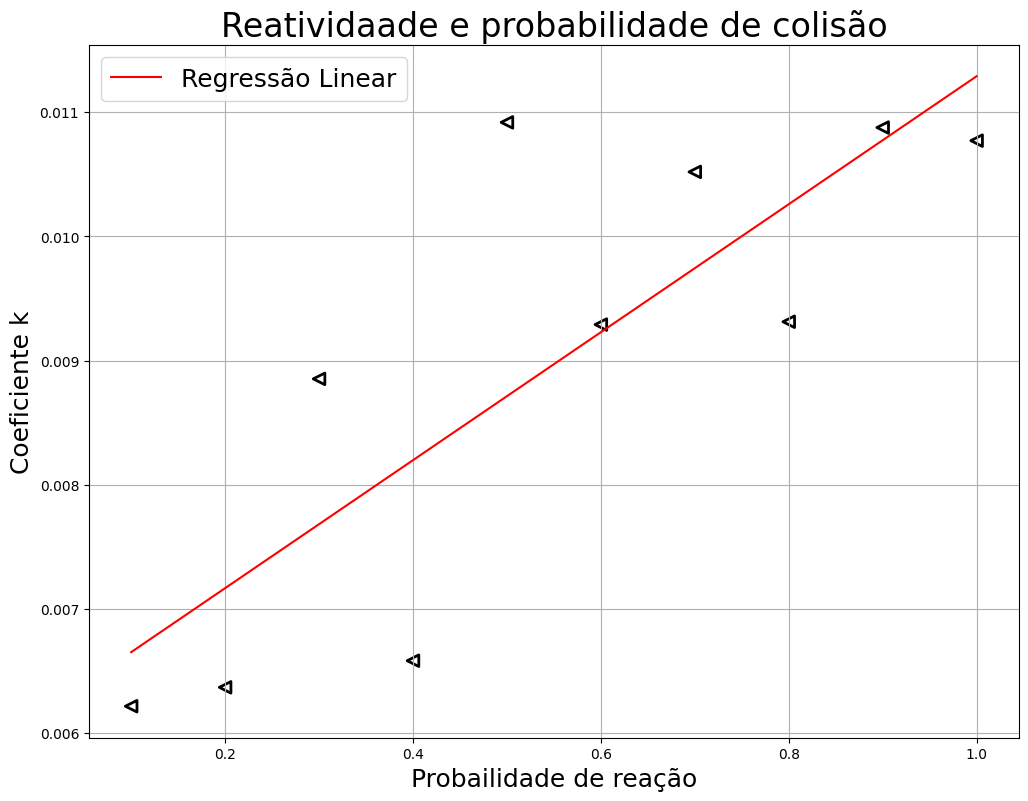

In [15]:
fig2, ax2 = plt.subplots(1,1, figsize = (12, 9))
X = np.array(REATIVIDADE).reshape(-1, 1)  
y = np.array(Ks)

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

X = np.linspace(X[0],X[-1] )
ax2.plot(X, model.predict(X), color='red', label='Regressão Linear')
ax2.set_title('Reatividaade e probabilidade de colisão', fontsize = 24)
ax2.set_ylabel('Coeficiente k', fontsize = 18)
ax2.set_xlabel('Probailidade de reação', fontsize = 18)
ax2.scatter(REATIVIDADE, Ks, s = 70,marker='<',facecolors='none', edgecolors = '0',linewidths=2)
ax2.grid('--')
ax2.legend(fontsize=18)
fig2.savefig('resultados/coef_react.png',dpi = 200)

### Quantidade de Partículas

In [16]:
# parâmetros sistema:
NUM_PARTICULAS= [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
TAMANHO_CAIXA = 300
MASSA = 0.5
RAIO = 1.2
REATIVIDADE = 1

# parâmetros simulação:
TFIM = 40
NUM_STEPS = 400
STEP = TFIM/NUM_STEPS

20
40
60
80
100
120
140
160
180
200
220
240


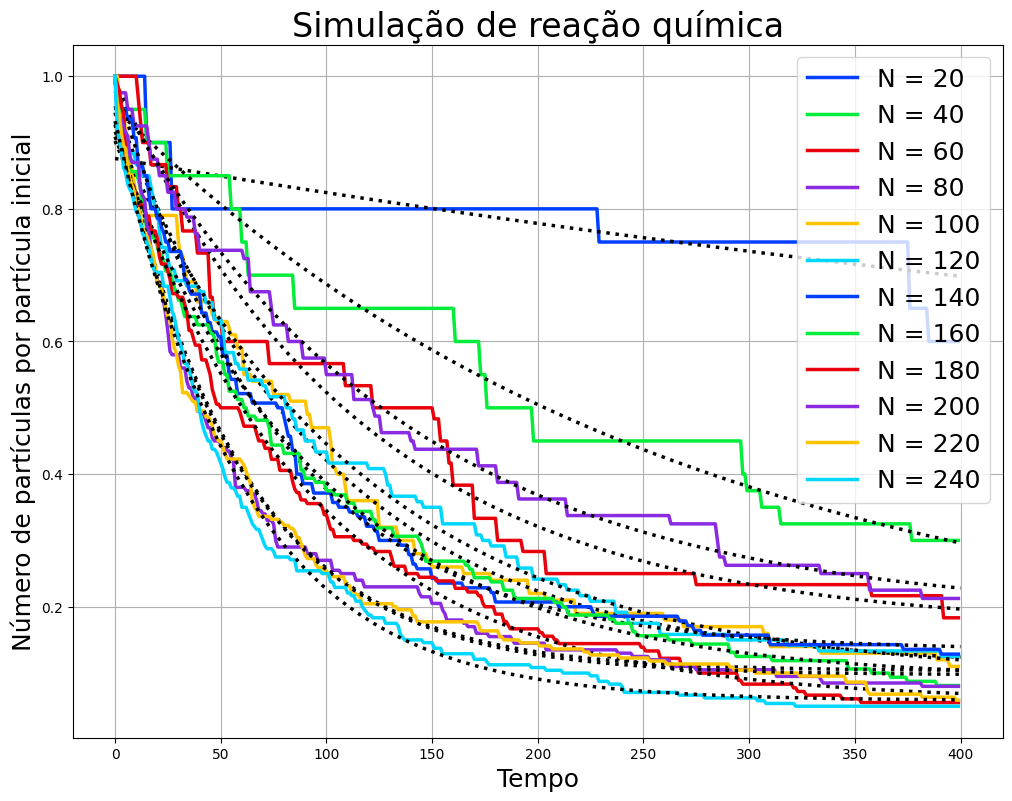

In [17]:
fig3, ax3 = plt.subplots(1,1, figsize = (12, 9))
ax3.set_title('Simulação de reação química', fontsize = 24)
ax3.set_ylabel('Número de partículas por partícula inicial', fontsize = 18)
ax3.set_xlabel('Tempo', fontsize = 18)
ax3.grid('- -')

Ks = []

def funcao_fit(x, k,C, D):
    return C*np.exp(-k*x) + D
    
for num_particulas in NUM_PARTICULAS:
    
    PARTICULAS = lista_inicial(num_particulas, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA, reatividade = REATIVIDADE)
    print(len(PARTICULAS))
    for i in range(NUM_STEPS):
        step(PARTICULAS, STEP, TAMANHO_CAIXA)
    
    trajetorias = []
    existencia = []
    cores = []
    for i in PARTICULAS:
        traj = list(i.trapos)
        exist = list(i.lista_existe)
        lista_cores = list(i.lista_tipo)
        trajetorias.append(traj)
        existencia.append(exist)
        cores.append(lista_cores)
        
    A = []
    B = []
    for k in range(NUM_STEPS):
        a = 0
        b = 0

        for h in range(len(trajetorias)):
            cor = cores[h][k]
            e = existencia[h][k]
            if cor == '0' and e == 1:
                a = a+1
            if cor == 'r' and e == 1:
                b = b+1
        A.append(a)
        B.append(b)

    ax3.plot(range(NUM_STEPS), np.array(A)/num_particulas, linewidth = 2.5, label = f'N = {num_particulas}')
    ax3.legend(fontsize=18)

    funcao_fit_model=lmfit.Model(funcao_fit)
    funcao_fit_model.set_param_hint('D',value=32, vary=True)#,min= -10,max=10,vary=True) 
    funcao_fit_model.set_param_hint('C',value=150, vary=True)#,min= -10,max=10,vary=True) 
    funcao_fit_model.set_param_hint('k',value=0.05, vary=True)#,min= -10,max=10,vary=True) 

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(A, x = tempo, params = param)
    k = results.params['k'].value
    Ks.append(k)
    D = results.params['D'].value
    C = results.params['C'].value
    x_fit = np.linspace(0, NUM_STEPS)
    y_fit = funcao_fit(x_fit, k, C, D)
    ax3.plot(x_fit, y_fit/num_particulas, linewidth = 2.5, linestyle = ':', c= '0')

In [18]:
fig3.savefig('resultados/num_react.png', dpi = 200)

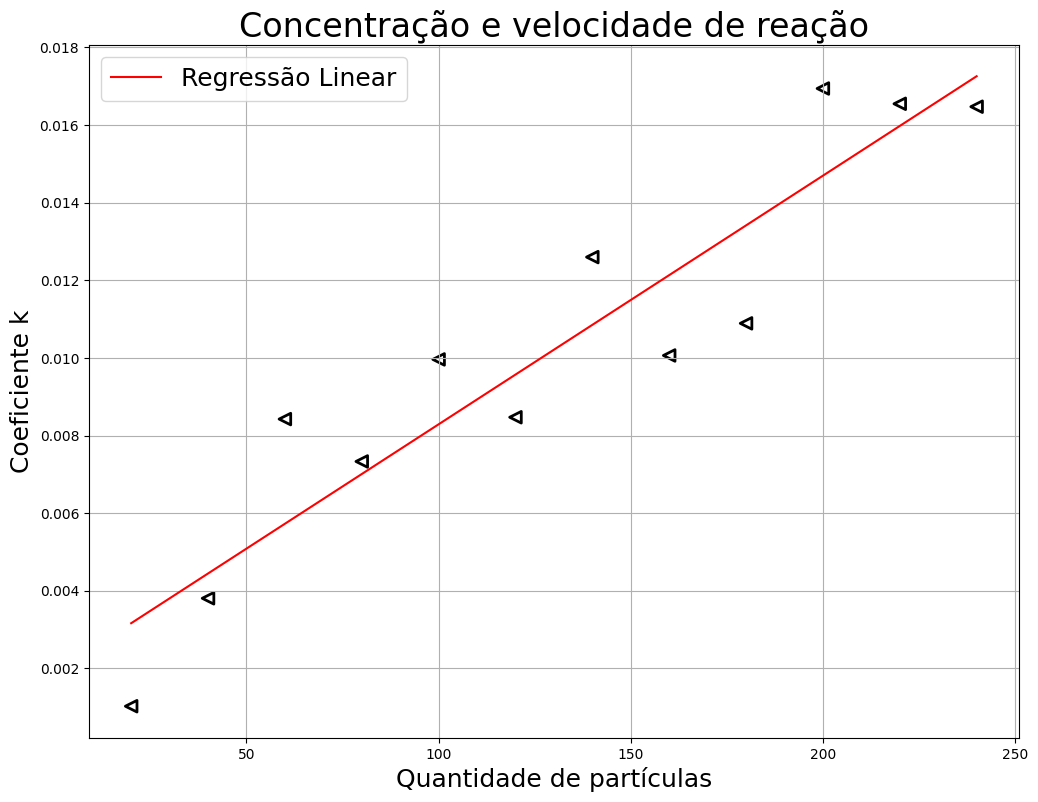

In [19]:
fig4, ax4 = plt.subplots(1,1, figsize = (12, 9))
X = np.array(NUM_PARTICULAS).reshape(-1, 1)  
y = np.array(Ks)

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

X = np.linspace(X[0],X[-1] )
ax4.plot(X, model.predict(X), color='red', label='Regressão Linear')
ax4.set_title('Concentração e velocidade de reação', fontsize = 24)
ax4.set_ylabel('Coeficiente k', fontsize = 18)
ax4.set_xlabel('Quantidade de partículas', fontsize = 18)
ax4.scatter(NUM_PARTICULAS, Ks, s = 70,marker='<',facecolors='none', edgecolors = '0',linewidths=2)
ax4.grid('--')
ax4.legend(fontsize=18)
fig4.savefig('resultados/coef_react_num.png',dpi = 200)